In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,['Region']]=0
df.loc[122:,['Region']]=1

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [11]:
df['Region']=df['Region'].astype(int)

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [14]:
## df.iloc[[122,167]]
df.iloc[[122,167]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [15]:
df=df.drop([122,167]).reset_index(drop=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [16]:
df=df.drop([122,167]).reset_index(drop=True)
df


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
238,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
239,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [18]:
## Fix spaces in column names
df.columns=df.columns.str.strip()

In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int64 
 1   month        242 non-null    int64 
 2   year         242 non-null    int64 
 3   Temperature  242 non-null    int64 
 4   RH           242 non-null    int64 
 5   Ws           242 non-null    int64 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.5+ KB


In [22]:
df.columns.unique()

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int64 
 1   month        242 non-null    int64 
 2   year         242 non-null    int64 
 3   Temperature  242 non-null    int64 
 4   RH           242 non-null    int64 
 5   Ws           242 non-null    int64 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.5+ KB


In [24]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [25]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI','Region']].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.5+ KB


In [27]:
df['Rain'].unique()

array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

In [28]:
df['FFMC'].unique()

array([65.7, 64.4, 47.1, 28.6, 64.8, 82.6, 88.2, 86.6, 52.9, 73.2, 84.5,
       84. , 50. , 59. , 49.4, 36.1, 37.3, 56.9, 79.9, 59.8, 81. , 79.1,
       81.4, 85.9, 86.7, 86.8, 89. , 89.1, 88.7, 59.9, 55.7, 63.1, 80.1,
       87. , 80. , 85.6, 66.6, 81.1, 75.1, 81.8, 73.9, 60.7, 72.6, 82.8,
       85.4, 88.1, 73.4, 68.2, 70. , 84.3, 89.2, 90.3, 86.5, 87.2, 78.8,
       78. , 76.6, 85. , 86.4, 77.1, 87.4, 88.9, 81.3, 82.4, 80.2, 89.3,
       89.4, 88.3, 88.6, 89.5, 85.8, 84.9, 90.1, 72.7, 52.5, 46. , 30.5,
       42.6, 68.4, 80.8, 75.8, 69.6, 62. , 56.1, 58.5, 71. , 40.9, 47.4,
       44.9, 78.1, 87.7, 83.8, 87.8, 77.8, 73.7, 68.3, 48.6, 82. , 85.7,
       77.5, 45. , 57.1, 48.7, 79.4, 83.7, 71.4, 90.6, 72.3, 53.4, 66.8,
       62.2, 65.5, 64.6, 60.2, 86.2, 78.3, 74.2, 85.3, 86. , 92.5, 79.7,
       63.7, 87.6, 84.7, 88. , 90.5, 82.3, 74.8, 85.2, 84.6, 86.1, 89.9,
       93.9, 91.5, 87.3, 72.8, 73.8, 87.5, 93.3, 93.7, 93.8, 70.5, 69.7,
       91.7, 94.2, 93. , 91.9, 83.9, 92. , 96. , 94

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 28.5+ KB


In [30]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.760331,7.504132,2012.0,32.157025,61.954545,15.487603,0.766116,77.814876,14.661157,49.498347,4.742562,16.680165,7.034298,0.495868
std,8.860865,1.116634,0.0,3.634798,14.797176,2.815534,2.006754,14.372958,12.414988,47.752761,4.162843,14.256990,7.455969,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,71.625000,5.800000,11.425000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.200000,11.250000,33.250000,3.400000,12.250000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.000000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [31]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


## Save the claened dataset

In [32]:
df.to_csv('Algerian_forest_fires_cleaned.csv',index=False)

##  EDA

In [33]:
df_copy=df.drop(['day', 'month', 'year'],axis=1)

In [34]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [35]:
df_copy['Classes'].str.strip().value_counts()


fire        136
not fire    106
Name: Classes, dtype: int64

In [36]:
df_copy['Classes']=df_copy['Classes'].str.strip()


In [37]:
df_copy['Classes'].value_counts()

fire        136
not fire    106
Name: Classes, dtype: int64

In [38]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [39]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [40]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [41]:
## Independent And dependent features
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [42]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0.0


In [43]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    6.5
238    0.0
239    0.2
240    0.7
241    0.5
Name: FWI, Length: 242, dtype: float64

In [44]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [45]:
X_train.shape,X_test.shape

((181, 11), (61, 11))

In [46]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647087,-0.278207,-0.320465,0.695874,0.491115,0.377796,0.626962,0.464454,0.512498,0.250148
RH,-0.647087,1.000000,0.249640,0.236646,-0.642370,-0.415940,-0.235976,-0.707578,-0.362884,-0.447509,-0.385562
Ws,-0.278207,0.249640,1.000000,0.230003,-0.159851,0.004452,0.106745,-0.001751,0.041841,-0.040229,-0.231225
Rain,-0.320465,0.236646,0.230003,1.000000,-0.546555,-0.289354,-0.305889,-0.354579,-0.301253,-0.374078,-0.050991
FFMC,0.695874,-0.642370,-0.159851,-0.546555,1.000000,0.619719,0.530956,0.760210,0.607658,0.785278,0.235126
DMC,0.491115,-0.415940,0.004452,-0.289354,0.619719,1.000000,0.875318,0.689260,0.983603,0.606200,0.199351
DC,0.377796,-0.235976,0.106745,-0.305889,0.530956,0.875318,1.000000,0.537535,0.946111,0.538577,-0.082291
ISI,0.626962,-0.707578,-0.001751,-0.354579,0.760210,0.689260,0.537535,1.000000,0.652753,0.758900,0.287995
BUI,0.464454,-0.362884,0.041841,-0.301253,0.607658,0.983603,0.946111,0.652753,1.000000,0.601960,0.098420
Classes,0.512498,-0.447509,-0.040229,-0.374078,0.785278,0.606200,0.538577,0.758900,0.601960,1.000000,0.173264


## Feature Selection

<AxesSubplot: >

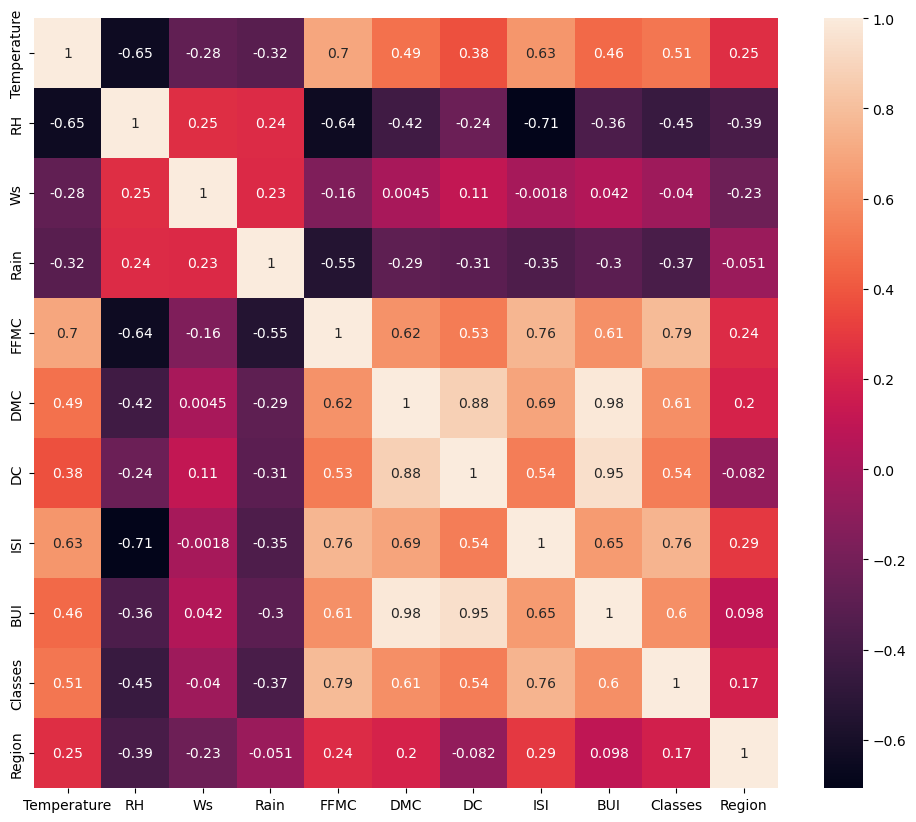

In [47]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [48]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647087,-0.278207,-0.320465,0.695874,0.491115,0.377796,0.626962,0.464454,0.512498,0.250148
RH,-0.647087,1.000000,0.249640,0.236646,-0.642370,-0.415940,-0.235976,-0.707578,-0.362884,-0.447509,-0.385562
Ws,-0.278207,0.249640,1.000000,0.230003,-0.159851,0.004452,0.106745,-0.001751,0.041841,-0.040229,-0.231225
Rain,-0.320465,0.236646,0.230003,1.000000,-0.546555,-0.289354,-0.305889,-0.354579,-0.301253,-0.374078,-0.050991
FFMC,0.695874,-0.642370,-0.159851,-0.546555,1.000000,0.619719,0.530956,0.760210,0.607658,0.785278,0.235126
DMC,0.491115,-0.415940,0.004452,-0.289354,0.619719,1.000000,0.875318,0.689260,0.983603,0.606200,0.199351
DC,0.377796,-0.235976,0.106745,-0.305889,0.530956,0.875318,1.000000,0.537535,0.946111,0.538577,-0.082291
ISI,0.626962,-0.707578,-0.001751,-0.354579,0.760210,0.689260,0.537535,1.000000,0.652753,0.758900,0.287995
BUI,0.464454,-0.362884,0.041841,-0.301253,0.607658,0.983603,0.946111,0.652753,1.000000,0.601960,0.098420
Classes,0.512498,-0.447509,-0.040229,-0.374078,0.785278,0.606200,0.538577,0.758900,0.601960,1.000000,0.173264


In [49]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [51]:
corr_features

{'BUI', 'DC'}

In [52]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

## Feature Scaling Or Standardization

In [53]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [54]:
X_train_scaled

array([[-0.83729197,  0.77781425,  1.27806135, ..., -0.62636713,
        -1.08661074, -0.98356052],
       [-0.29604252,  0.64224913, -0.53202554, ..., -0.93328964,
        -1.08661074,  1.01671425],
       [-0.83729197, -1.45901026, -2.7041298 , ..., -0.48471059,
         0.92029277,  1.01671425],
       ...,
       [-1.91979088,  0.91337937,  0.55402659, ..., -1.07494618,
        -1.08661074, -0.98356052],
       [ 1.05708111, -0.44227185,  0.19200922, ...,  0.8138077 ,
         0.92029277,  1.01671425],
       [-0.56666725,  0.98116193,  2.0020961 , ..., -0.86246137,
        -1.08661074, -0.98356052]])

/tmp/ipykernel_77/160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

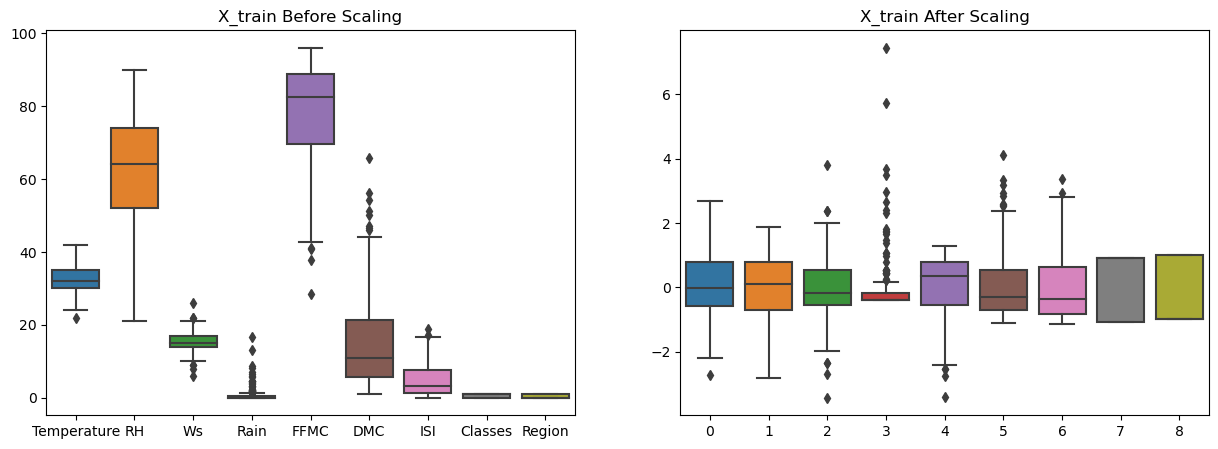

In [55]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## LINEAR REGRESSION

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6006890686060707
R2 Score 0.9834019743740678


## LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

## RIDGE REGRESSION

In [121]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.6266793456214433
R2 Score 0.9825846161440259


## ELASTICNET REGRESSION

In [122]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.9573242969943947
R2 Score 0.8691090748881366


## PICKILING

In [124]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))